# Exploratory Data Analysis - First Pass
Shpaner, Leonid  
Robinson, Christopher  
Luis-Estrada, Jose  

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
%cd /content/drive/Shared drives/Capstone - Best Group/navigating_crime/Code Library

/content/drive/Shared drives/Capstone - Best Group/navigating_crime/Code Library


In [3]:
####################################
## import the requisite libraries ##
####################################

import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate 

import warnings
warnings.filterwarnings('ignore')

In [4]:
# check current working directory
eda_path = os.getcwd()
eda_path

'/content/drive/Shared drives/Capstone - Best Group/navigating_crime/Code Library'

In [5]:
# path to the data file
data_path1 = 'https://raw.githubusercontent.com/MSADS-Capstone/navigating_crime/'\
          + 'main/Data%20Folder/Capstone_LACity_Walking_Streets_With_Crimes.csv'

# path to data folder
data_path2 = '/content/drive/Shareddrives/Capstone - Best Group/navigating_crime/'\
             'Data Folder/'

# path to the image library
image_path = '/content/drive/Shareddrives/Capstone - Best Group/navigating_crime'\
          + '/Image Folder'

In [6]:
# read in the csv file to a dataframe using pandas
df = pd.read_csv(data_path1, low_memory=False)
df.head()

,FullName,Type,Elevation,Surface,Status,DrivingDir,From_L,From_R,To_L,To_R,...,Status_1,Status_Des,Crm_Cd_1,Crm_Cd_2,Crm_Cd_3,Crm_Cd_4,LOCATION,Cross_Stre,LAT,LON
0,NaN,Minor,Surface,Paved,Unrestricted,Two Way,0,0,0,0,...,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0.0,0.0
1,NaN,Minor,Surface,Paved,Unrestricted,Two Way,0,0,0,0,...,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0.0,0.0
2,NaN,Alley,Surface,Paved,Unrestricted,Two Way,0,0,0,0,...,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0.0,0.0
3,NaN,Minor,Surface,Paved,Unrestricted,Two Way,0,0,0,0,...,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0.0,0.0
4,NaN,Minor,Surface,Paved,Unrestricted,Two Way,0,0,0,0,...,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0.0,0.0


## Data Report

In [7]:
def build_report(df):

  # create an empty log container for appending to output dataframe 
  log_txt = []

  print(' ')
  # append header to log_txt container defined above
  log_txt.append(' ')

  print('File Contents')
  log_txt.append('File Contents')

  print(' ')
  log_txt.append(' ')
  
  print('No. of Rows in File: ' + str(f"{df.shape[0]:,}"))
  log_txt.append('No. of Rows in File: ' + str(f"{df.shape[0]:,}"))

  print('No. of Columns in File: ' + str(f"{df.shape[1]:,}"))
  log_txt.append('No. of Columns in File: ' + str(f"{df.shape[1]:,}"))
  
  print(' ')
  log_txt.append(' ')

  print('ID Column Information')
  log_txt.append('ID Column Information')

  # filter out any columns contain the 'ID' string
  id_col = df.filter(like='ID').columns
  # if there are any columns that contain the '_id' string in df
  # print the number of unique columns and get a distinct count
  # otherwise, report that these Ids do not exist.

  if df[id_col].columns.any():
    df_print = df[id_col].nunique().apply(lambda x : "{:,}".format(x))
    df_print = pd.DataFrame(df_print)
    df_print.reset_index(inplace=True)
    df_print = df_print.rename(columns={0: 'Distinct Count',
                                            'index':'ID Columns'})
    # encapsulate this distinct count within a table
    df_tab = tabulate(df_print, headers='keys', tablefmt='psql')
    print(df_tab)
    log_txt.append(df_tab)
  else:
    df_notab = 'Street IDs DO NOT exist.'
    print(df_notab)
    log_txt.append(df_notab)
   
  print(' ')
  log_txt.append(' ')

  print('Zip Code Column Information')
  log_txt.append('Zip Code Column Information')

  # filter out any columns contain the 'Zip' string
  zip_col = df.filter(like='Zip').columns
  # if there are any columns that contain the 'Zip' string in df
  # print the number of unique columns and get a distinct count
  # otherwise, report that these Ids do not exist.

  if df[zip_col].columns.any():
    df_print = df[zip_col].nunique().apply(lambda x : "{:,}".format(x))
    df_print = pd.DataFrame(df_print)
    df_print.reset_index(inplace=True)
    df_print = df_print.rename(columns={0: 'Distinct Count',
                                            'index':'ID Columns'})
    # encapsulate this distinct count within a table
    df_tab = tabulate(df_print, headers='keys', tablefmt='psql')
    print(df_tab)
    log_txt.append(df_tab)
  else:
    df_notab = 'Street IDs DO NOT exist.'
    print(df_notab)
    log_txt.append(df_notab)

  print(' ')
  log_txt.append(' ')

  print('Date Column Information')
  log_txt.append('Date Column Information')

  # filter out any columns contain the 'Zip' string
  date_col = df.filter(like='Date').columns
  # if there are any columns that contain the 'Zip' string in df
  # print the number of unique columns and get a distinct count
  # otherwise, report that these Ids do not exist.

  if df[date_col].columns.any():
    df_print = df[date_col].nunique().apply(lambda x : "{:,}".format(x))
    df_print = pd.DataFrame(df_print)
    df_print.reset_index(inplace=True)
    df_print = df_print.rename(columns={0: 'Distinct Count',
                                            'index':'ID Columns'})
    # encapsulate this distinct count within a table
    df_tab = tabulate(df_print, headers='keys', tablefmt='psql')
    print(df_tab)
    log_txt.append(df_tab)
  else:
    df_notab = 'Street IDs DO NOT exist.'
    print(df_notab)
    log_txt.append(df_notab)

  print(' ')
  log_txt.append(' ')

  print('Column Data Types and Their Respective Null Counts')
  log_txt.append('Column Data Types and Their Respective Null Counts')

  # Features' Data Types and Their Respective Null Counts
  dat_type = df.dtypes

  # create a new dataframe to inspect data types
  dat_type = pd.DataFrame(dat_type)

  # sum the number of nulls per column in df
  dat_type['Null_Values'] = df.isnull().sum()

  # reset index w/ inplace = True for more efficient memory usage
  dat_type.reset_index(inplace=True)

  # percentage of null values is produced and cast to new variable
  dat_type['perc_null'] = round(dat_type['Null_Values'] / len(df)*100,0)
  
  # columns are renamed for a cleaner appearance
  dat_type = dat_type.rename(columns={0:'Data Type',
                                            'index': 'Column/Variable',
                                            'Null_Values': '# of Nulls',
                                            'perc_null': 'Percent Null'})

  # sort null values in descending order
  data_types = dat_type.sort_values(by=['# of Nulls'], ascending=False)
  
  # output data types (show the output for it)
  data_types = tabulate(data_types, headers='keys', tablefmt='psql')
  print(data_types)
  
  log_txt.append(data_types)
  report = pd.DataFrame({'LA City Walking Streets With Crimes Data Report'
                         :log_txt})
  return dat_type, report

In [8]:
# pass the build_report function to a new variable named report
data_report = build_report(df)

## DEFINING WHAT GETS SENT OUT

# save report to .txt file
data_report[1].to_csv(eda_path+'/data_report.txt', 
              index=False, sep="\t",
              quoting=csv.QUOTE_NONE, quotechar='', escapechar='\t')

# # save report to .rtf file
data_report[1].to_csv(eda_path+'/data_report.rtf', 
              index=False, sep="\t",
              quoting=csv.QUOTE_NONE, quotechar='', escapechar='\t')

 
File Contents
 
No. of Rows in File: 164,472
No. of Columns in File: 65
 
ID Column Information
+----+--------------+------------------+
|    | ID Columns   | Distinct Count   |
|----+--------------+------------------|
|  0 | SourceID     | 88,156           |
|  1 | StreetOID    | 89,462           |
+----+--------------+------------------+
 
Zip Code Column Information
+----+--------------+------------------+
|    | ID Columns   |   Distinct Count |
|----+--------------+------------------|
|  0 | Zip_L        |              151 |
|  1 | Zip_R        |              151 |
+----+--------------+------------------+
 
Date Column Information
+----+--------------+------------------+
|    | ID Columns   |   Distinct Count |
|----+--------------+------------------|
|  0 | UpdateDate   |              137 |
|  1 | Date_Rptd    |              825 |
+----+--------------+------------------+
 
Column Data Types and Their Respective Null Counts
+----+-------------------+-------------+--------------+

In [9]:
# access data types from build_report() function
data_types = data_report[0]

# store data types in a .txt file in working directory for later use/retrieval
data_types.to_csv(data_path2+'data_types.csv', index=False)
# subset of only numeric features
data_subset_num = data_types[(data_types['Data Type']=='float64') | \
                             (data_types['Data Type']=='int64')]

# subset of only rows that are fully null
data_subset_100 = data_types[data_types['Percent Null'] == 100]
# list these rows
data_subset_100 = data_subset_100['Column/Variable'].to_list()
print('The following columns contain all null rows:', data_subset_100, '\n')

# subsetting dataframe based on values that are not 100% null
data_subset = data_subset_num[data_subset_num['Percent Null'] < 100]

# list these rows
data_subset = data_subset['Column/Variable'].to_list()
df_subset = df[data_subset]

# dropping columns from this dataframe subset, such that the histogram
# that will be plotted below does not show target column(s)
df_crime_subset = df_subset.drop(columns=['Crm_Cd', 'Crm_Cd_1', 'Crm_Cd_2'])
# print columns of dataframe subset
print('The following columns remain in the subset:', '\n')
df_subset.columns

The following columns contain all null rows: ['StPreMod', 'StPostDir', 'StPostMod', 'Status_1', 'Crm_Cd_3', 'Crm_Cd_4'] 

The following columns remain in the subset: 



Index(['From_L', 'From_R', 'To_L', 'To_R', 'Zip_L', 'Zip_R', 'Accuracy',
       'MSAG_LESN', 'MSAG_RESN', 'Crime_Cost', 'StreetOID', 'DR_NO',
       'TIME_OCC', 'AREA', 'Rpt_Dist_N', 'Part_1_2', 'Crm_Cd', 'Vict_Age',
       'Premis_Cd', 'Weapon_Use', 'Crm_Cd_1', 'Crm_Cd_2', 'LAT', 'LON'],
      dtype='object')

## Plots

### Histogram Distributions

Histogram distributions are plotted for the entire dataframe where numeric features exist. Axes labels are not passed in, since the `df.hist()` function is a first pass effort to elucidate the shape of each feature from a visual standpoint alone. Further analysis for features of interest provides more detail.

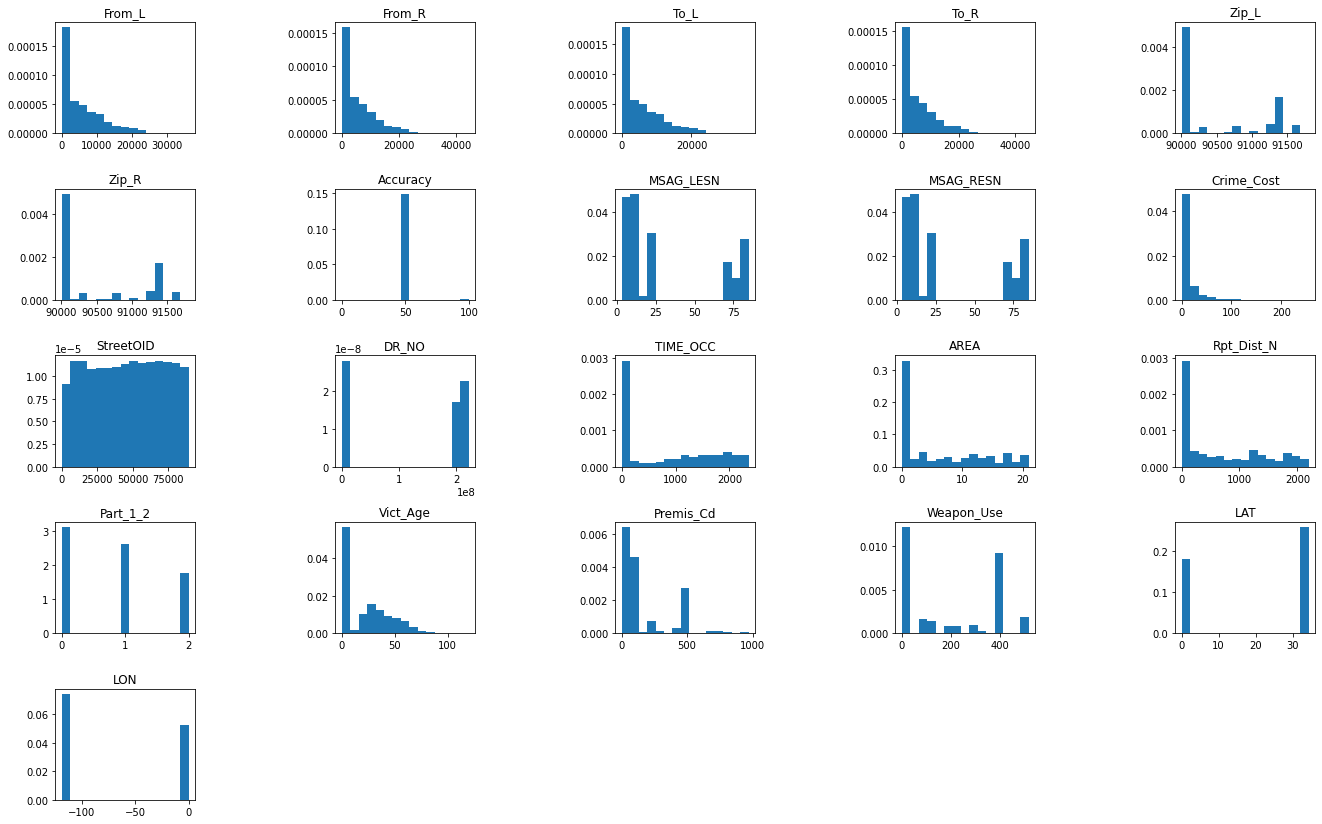

In [10]:
# create histograms for development data to inspect distributions
fig1 = df_crime_subset.hist(figsize=(25,12), grid=False, density=True, bins=15)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.8, 
                    top=1, wspace=1.0, hspace=0.5)
plt.savefig(image_path+'/histogram.png', bbox_inches = 'tight')
plt.show()

### Boxplot Distributions

In [11]:
# Function for selected boxplot distributions
def sns_boxplot(df, title, ylabel, column):
  fig = plt.figure(figsize = (15,1.5)) # set figure size
  plt.title(title) # set plot title
  plt.ylabel(ylabel) # set plot y-axis label
  # seaborn boxplot function w/ horizontal orientation
  boxplot = sns.boxplot(df[column], palette="coolwarm", 
                        orient='h', linewidth=2.5)
  print()
  print('Summarizing', column)
  # Computing IQR
  Q1 = df[column].quantile(0.25) # first quartile
  Q3 = df[column].quantile(0.75) # third quartile
  IQR = Q3-Q1 # interquartile range

  # Computing Summary Stats of average_monthly_hours
  mean = round(df[column].mean(),2) # calculate mean
  std = round(df[column].std(),2) # calculate standard dev.
  median = round(df[column].median(),2) # calculate median

  # print statements for summary statistics
  Q1_print = print('The first quartile is %s. '%Q1)
  Q3_print = print('The third quartile is %s. '%Q3)
  IQR_print = print('The IQR is %s.'%round(IQR,2))
  mean_print = print('The mean is %s.'%mean)
  std_print = print('The standard deviation is %s.'%std)
  median_print = print('The median is %s.'%median)
  # if mean is greater than median, (+) skewed; 
  # otherwise (-) skewed.
  if mean > median:
    print('The distribution is positively skewed.')
  else:
    print('The distribution is negatively skewed.')
  print()  


Summarizing Vict_Age
The first quartile is 0.0. 
The third quartile is 38.0. 
The IQR is 38.0.
The mean is 21.05.
The standard deviation is 22.25.
The median is 20.0.
The distribution is positively skewed.


Summarizing Weapon_Use
The first quartile is 0.0. 
The third quartile is 400.0. 
The IQR is 400.0.
The mean is 195.39.
The standard deviation is 191.89.
The median is 109.0.
The distribution is positively skewed.


Summarizing AREA
The first quartile is 0.0. 
The third quartile is 12.0. 
The IQR is 12.0.
The mean is 6.12.
The standard deviation is 7.02.
The median is 3.0.
The distribution is positively skewed.



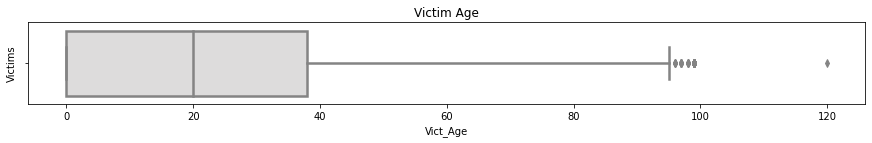

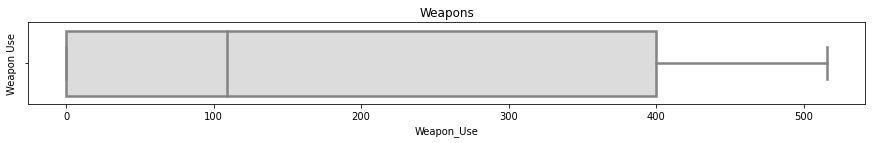

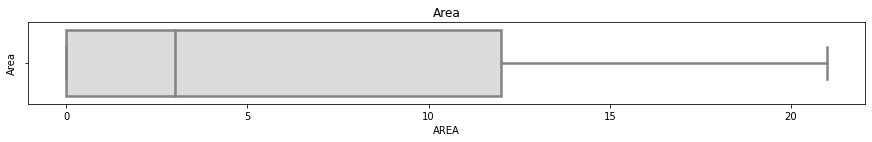

In [12]:
sns_boxplot(df, 'Victim Age', 'Victims', 'Vict_Age')
plt.savefig(image_path + '/boxplot1.png', bbox_inches = 'tight')

sns_boxplot(df, 'Weapons', 'Weapon Use', 'Weapon_Use')
plt.savefig(image_path + '/boxplot2.png', bbox_inches = 'tight')

sns_boxplot(df, 'Area', 'Area', 'AREA')
plt.savefig(image_path + '/boxplot3.png', bbox_inches = 'tight')

### Bar Charts

In [13]:
# function definition for horizontal barplot of any column in this dataframe
def bar_plot_h(df, title, xlabel, ylabel, column, n):
    # set figure size
    fig, axes = plt.subplots(figsize=(10,12))
    # sort values in ascending order and generate top n rows
    bar_plot = df[column].value_counts().sort_values(ascending=True).head(n)  
    bar_plot.plot(kind='barh', width=0.9) # plot horizontal bar graph
    plt.title(title) # set plot title
    plt.xlabel(xlabel) # set plot x-axis label
    plt.ylabel(ylabel) # set plot y-axis label

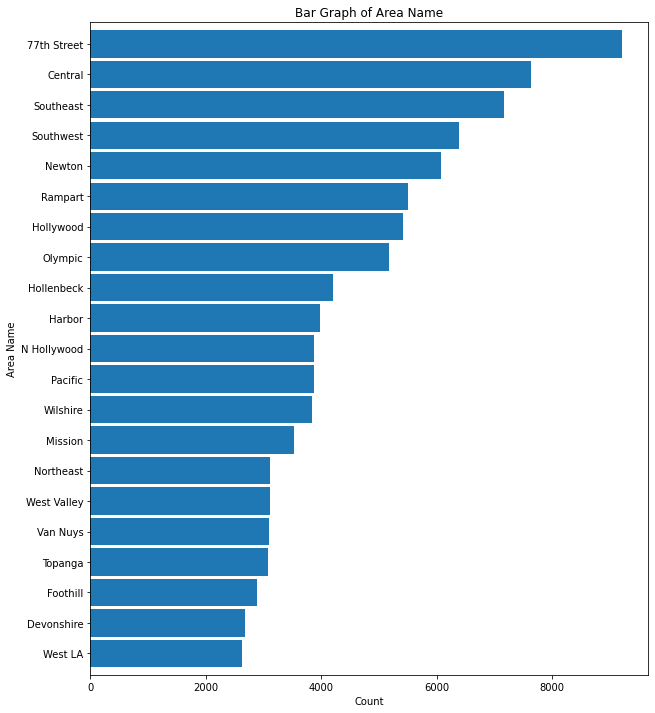

In [14]:
bar_plot_h(df, 'Bar Graph of Area Name', 'Count', 'Area Name', 'AREA_NAME', 100)
plt.savefig(image_path + '/area_name_bargraph.png', bbox_inches = 'tight')

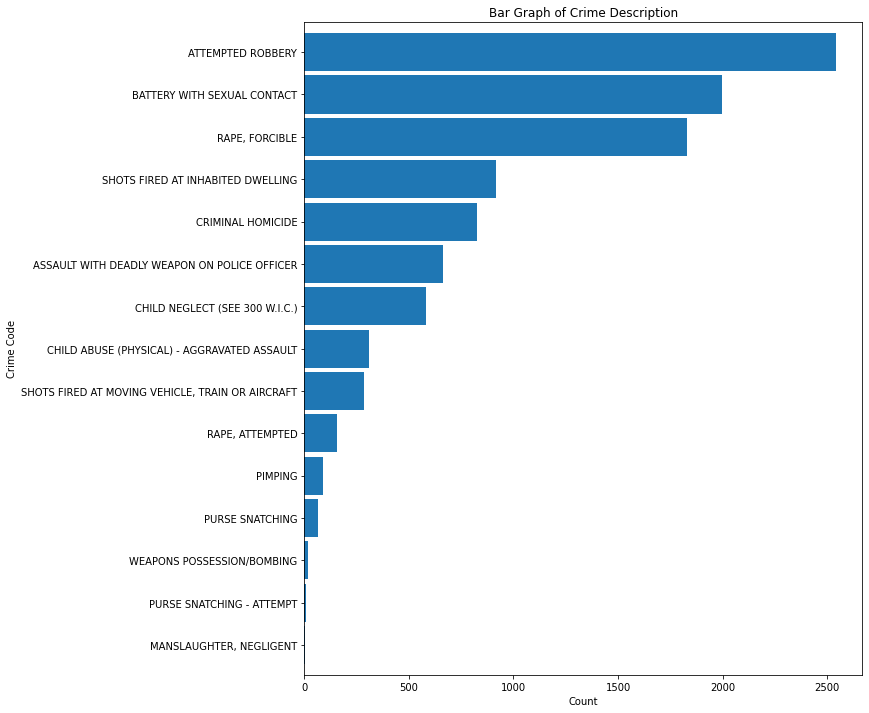

In [15]:
bar_plot_h(df, 'Bar Graph of Crime Description', 'Count', 'Crime Code', 
           'Crm_Cd_Des', 15)
plt.savefig(image_path + '/crime_desc_bargraph.png', bbox_inches = 'tight')

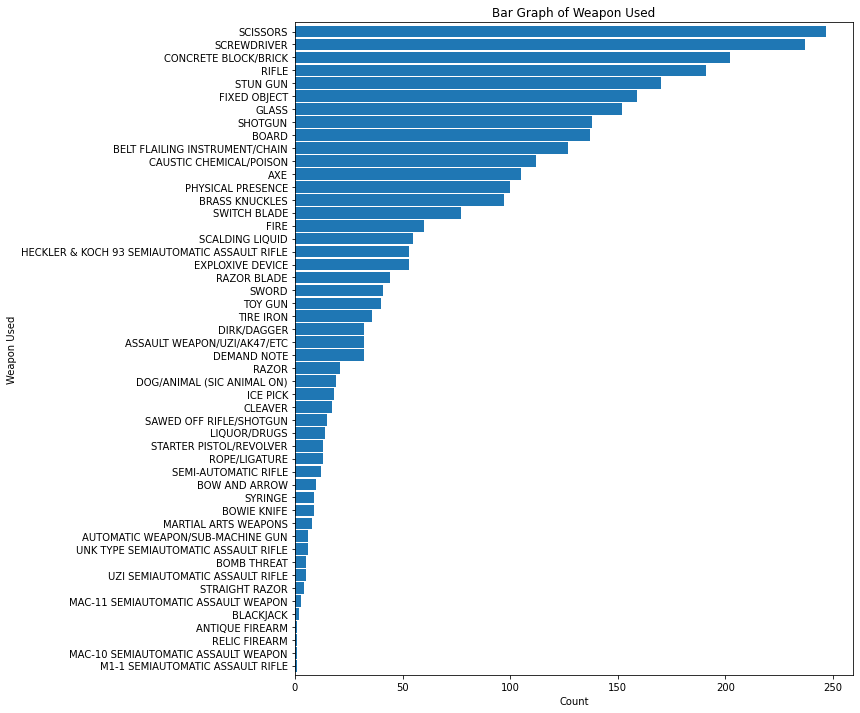

In [16]:
bar_plot_h(df, 'Bar Graph of Weapon Used', 'Count', 'Weapon Used', 'Weapon_Des', 50)
plt.savefig(image_path + '/weapon_used_bargraph.png', bbox_inches = 'tight')